# Content of provided notebook

## Wprowadzenie
Skrypt pokazuje jak użyć pakietu SciKit do grupowania danych. Rozważane są dwa przykłady: dwuwymiarowe dane wygenerowane losowo z mieszaniny rozkładów gaussowskich oraz dane IRIS.

In [0]:
% matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets,metrics
from sklearn.cluster import KMeans, MiniBatchKMeans, Birch, DBSCAN

iris = datasets.load_iris()

In [0]:
vec = np.array([[1,2,3],[4,5,6]],dtype="float32")
abc = np.linalg.norm(vec,axis=1)
vec[abc > 4] = vec[abc>4] / abc[abc >4 ]
vec

array([[1.        , 2.        , 3.        ],
       [0.45584232, 0.5698029 , 0.68376344]], dtype=float32)

In [0]:
import matplotlib.colors as colors
from itertools import cycle

def plotClustering(X, plt_labels,show_unassigned = False):
    plt_colors = cycle(colors.cnames.keys())

    plt_K = np.unique(plt_labels).size
    for k in xrange(plt_K):
        color = plt_colors.next()
        mask = (plt_labels == k)
        plt.plot(X[mask, 0], X[mask, 1], 'w', markerfacecolor=color, marker='o')
    if show_unassigned:
        mask_not_assigned = (plt_labels == -1)
        plt.scatter(X[mask_not_assigned, 0], X[mask_not_assigned, 1],marker='x')
        
    #plt.show()
    print 'Silhouette Coefficient', metrics.silhouette_score(X,plt_labels)
    print 'Dunn index', dunn_index(X,plt_labels)
    print 'Davies-Boulding index', davies_bouldin_index(X,plt_labels)

In [0]:
plt_colors_history = []
def scatterClustering(X, plt_labels,show_unassigned = False):
    print 'Silhouette Coefficient', metrics.silhouette_score(X,plt_labels)
    print 'Dunn index', dunn_index(X,plt_labels)
    plt_colors = cycle(colors.cnames.keys())

    plt_K = np.unique(plt_labels).size
    for k in xrange(plt_K):
        color = plt_colors.next()
        mask = (plt_labels == k)
        plt.scatter(X[mask, 0], X[mask, 1], color=color, marker='o')
        plt_colors_history.append(color)
    if show_unassigned:
        mask_not_assigned = (plt_labels == -1)
        plt.scatter(X[mask_not_assigned, 0], X[mask_not_assigned, 1],marker='x')
    #plt.show()


## 1. Pierwszy zestaw danych
Dwuwymiarowe dane wygenerowane losowo z mieszaniny rozkładów gaussowskich

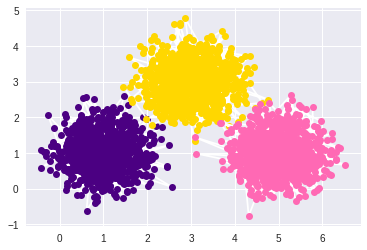

Silhouette Coefficient 0.6624760856905128
Dunn index

NameError: ignored

In [0]:
centers_ = [[1, 1], [3, 3], [5, 1]]
X, labels = datasets.make_blobs(n_samples=3000, n_features=2, centers=centers_, cluster_std=0.5)

plotClustering(X, labels)

### Grupowanie za pomocą KMeans

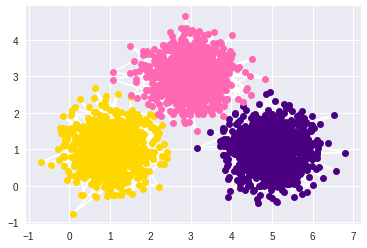

Silhouette Coefficient 0.6759887276254669
Dunn index 0.017515803288407208
Davies-Boulding index 0.49601280498037986


In [0]:
k_means = KMeans(init='k-means++', n_clusters=3, n_init=1)
k_means.fit(X)

plotClustering(X, k_means.labels_)

### Grupowanie za pomocą MiniBatchKMeans

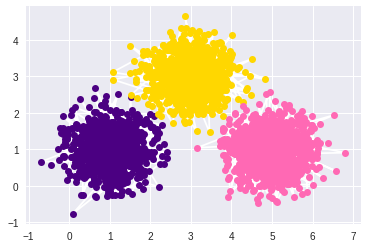

Silhouette Coefficient 0.6759276851076198
Dunn index 0.017515803288407208
Davies-Boulding index 0.49626348399494774


In [0]:
mini_batch_k_means = MiniBatchKMeans(init='k-means++', n_clusters=3, batch_size=100, n_init=1, max_no_improvement=10, verbose=0, random_state=0)
mini_batch_k_means.fit(X)

plotClustering(X, mini_batch_k_means.labels_)

### Grupowanie za pomocą Birch bez wtórnego grupowania

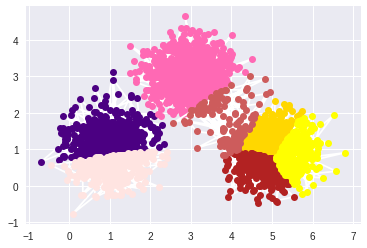

Silhouette Coefficient 0.3600582785341826
Dunn index 0.005218553922255651
Davies-Boulding index 1.1461059381158745


In [0]:
birch = Birch(threshold=0.75, n_clusters=None)
birch.fit(X)

plotClustering(X, birch.labels_)

### Grupowanie za pomocą Birch z wtórnym grupowaniem

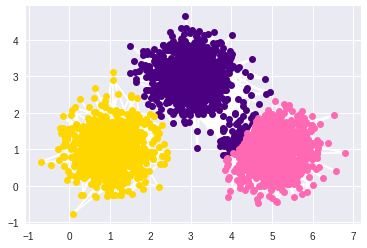

Silhouette Coefficient 0.651675041576732
Dunn index 0.0076940630580070975
Davies-Boulding index 0.5433308369183801


In [0]:
birch = Birch(threshold=0.75, n_clusters=3)
birch.fit(X)

plotClustering(X, birch.labels_)

### Grupowanie za pomocą DBScan

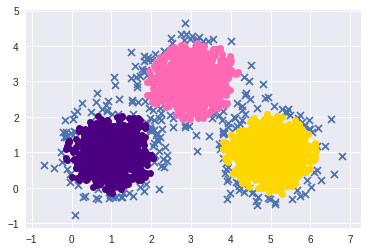

Silhouette Coefficient 0.6049523259657424
Dunn index 0.23851487284480472
Davies-Boulding index 0.4437860978743923


In [0]:
dbscan = DBSCAN(eps=0.25, min_samples=25)
dbscan.fit(X)

plotClustering(X, dbscan.labels_,True)

## 2. Drugi zestaw danych
Dane IRIS

In [0]:
X = iris.data

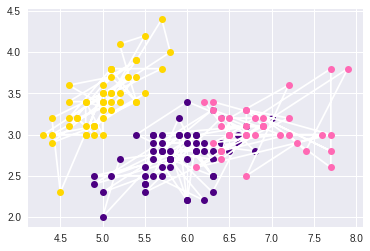

In [0]:
k_means = KMeans(init='k-means++', n_clusters=3, n_init=1)
k_means.fit(X)

plotClustering(X[:, :2], k_means.labels_)

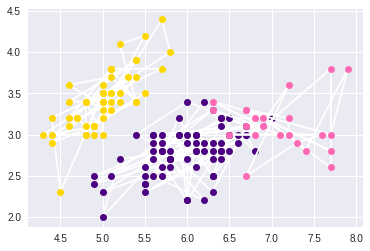

In [0]:
birch = Birch(threshold=0.75, n_clusters=3)
birch.fit(X)

plotClustering(X[:, :2], birch.labels_)

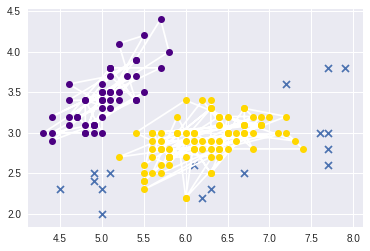

In [0]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)

plotClustering(X[:, :2], dbscan.labels_,True)

# Task 0 [2 p]


Kilka popularnych algorytmów grupowania danych dostępnych jest w pakiecie SciKit do Pythona.
Zapoznaj się z nimi wykonując skrypt umieszczony w materiałach do wykładu.

a) Jakie znaczenie ma parametr n_init w implementacji algorytmu KMeans? Powtórz obliczenia z
różnymi wartościami tego parametru i przeanalizuj wyniki.

b) Jakie znaczenie ma parametr threshold w implementacji algorytmu Birch? Powtórz obliczenia z
różnymi wartościami tego parametru i przeanalizuj wyniki.

c) Jakie znaczenie ma parametr eps w implementacji algorytmu DBScan? Powtórz obliczenia z
różnymi wartościami tego parametru i przeanalizuj wyniki.

d) Rozszerz skrypt tak, aby na rysunkach z wynikami algorytmu DBScan widoczne były także
punkty danych nie przypisane przez algorytm do żadnej grupy.

e) Wyniki grupowania danych IRIS są pokazywane na rysunkach dla dwóch pierwszych cech. Zrób
rysunki dla pozostałych par cech.

f) Rozszerz skrypt tak, aby oceniał każde wykonane grupowanie danych wskaźnikami poprawności
grupowania, takimi jak Silhouette Coefficient, Dunn Index oraz Davies-Bouldin Index.

Wskazówka: Silhouette Coefficient jest dostępny w pakiecie SciKit (http://scikitlearn.org/stable/modules/clustering.html#silhouette-coefficient),
definicje pozostałych wskaźników można
znaleźć w literaturze i należy zaimplementować samemu. 


In [0]:
centers_ = [[1, 1], [3, 3], [5, 1]]
X_blobs, labels = datasets.make_blobs(n_samples=3000, n_features=2, centers=centers_, cluster_std=0.5)
X_iris = iris.data

## a

*n_init *-> Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia(within-cluster sum-of-squares).

In [0]:
def task_0_kmeans(X,n_init):
    for n in n_init:
        print 'N_init = ',n
        k_means = KMeans(init='k-means++', n_clusters=3, n_init=n)
        k_means.fit(X)

        plotClustering(X, k_means.labels_)

N_init =  1


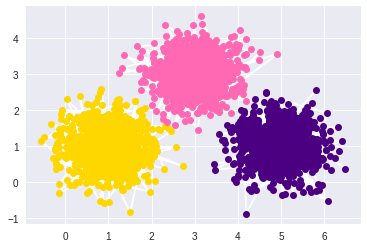

N_init =  2


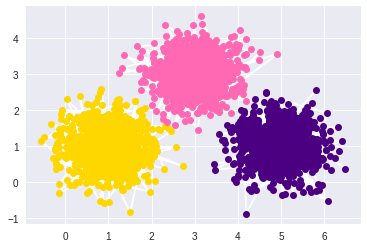

N_init =  3


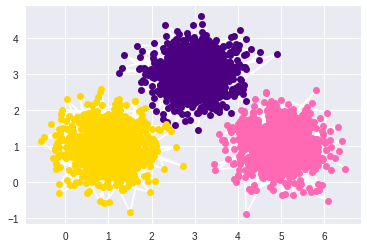

N_init =  5


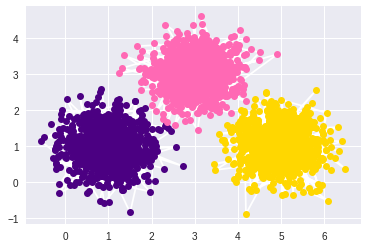

N_init =  10


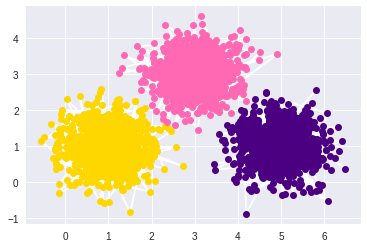

In [0]:
task_0_kmeans(X_blobs,[1,2,3,5,10])

N_init =  1


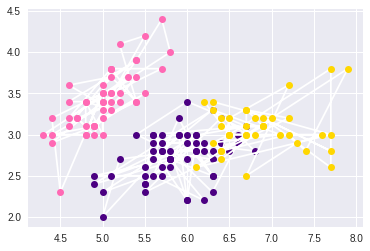

N_init =  2


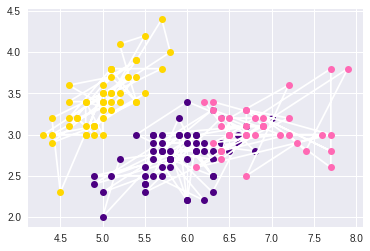

N_init =  3


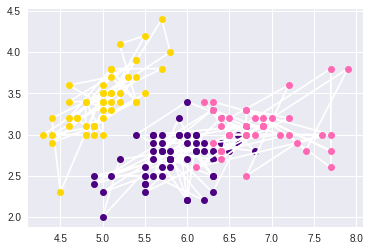

N_init =  5


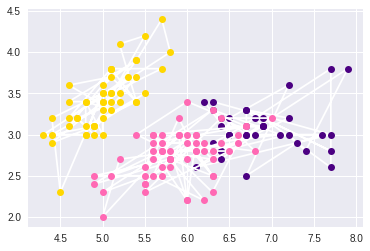

N_init =  10


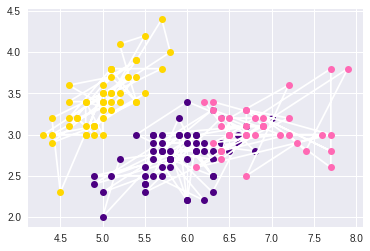

In [0]:
task_0_kmeans(X_iris,[1,2,3,5,10])

## b

threshold : float, default 0.5
The radius of the subcluster obtained by merging a new sample and the closest subcluster should be lesser than the threshold. Otherwise a new subcluster is started. Setting this value to be very low promotes splitting and vice-versa.

In [0]:
def bitrch_thresh(X,thresholds,n_clusters = None):
    for tresh in thresholds:
        birch = Birch(threshold=tresh, n_clusters=n_clusters)
        birch.fit(X)
        print "threshold = ", tresh
        plotClustering(X, birch.labels_)

threshold =  0.2


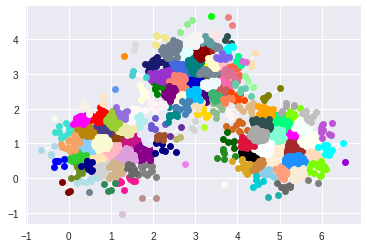

threshold =  0.4


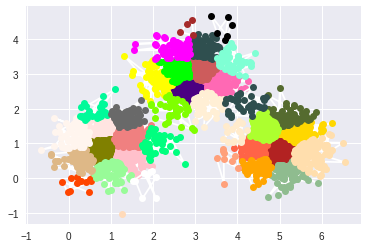

threshold =  0.75


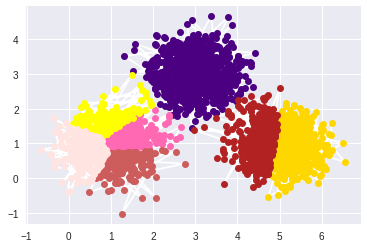

threshold =  0.95


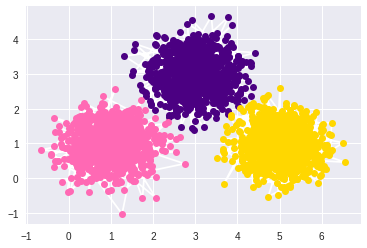

In [0]:
bitrch_thresh(X_blobs,[0.2,0.4,0.75,0.95])

## c


eps - > The maximum distance between two samples for them to be considered as in the same neighborhood.

In [0]:
def db_scan_eps(X,eps):
    for e in eps:
        dbscan = DBSCAN(eps=e, min_samples=25)
        dbscan.fit(X)
        print "eps = ",e
        plotClustering(X, dbscan.labels_,True)

eps =  0.1


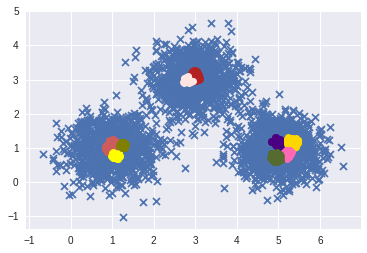

eps =  0.2


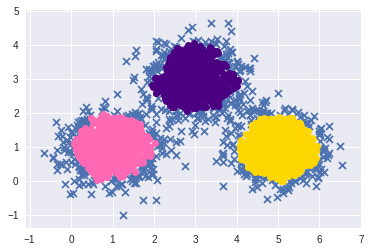

eps =  0.3


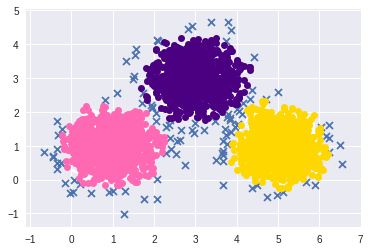

eps =  0.4


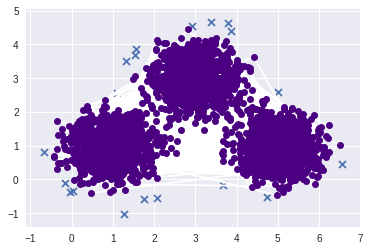

eps =  0.95


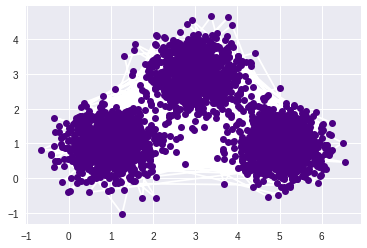

In [0]:
db_scan_eps(X_blobs,[0.1,0.2,0.3,0.4,0.95])

## e

In [0]:
def plot_iris(iris_data,lables,show_unassigned = False):
    for i in range(4):
        for j in range(i+1,4):
            print 'plot for feature',i,'with feature',j
            data = np.vstack([iris_data[:,i],iris_data[:,j]]).T
            plotClustering(data,lables,show_unassigned)

In [0]:
 (np.vstack([X_iris[:,0],X_iris[:,1]]).T).shape

(150, 2)

plot for feature 0 with feature 1


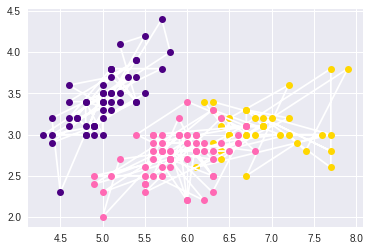

plot for feature 0 with feature 2


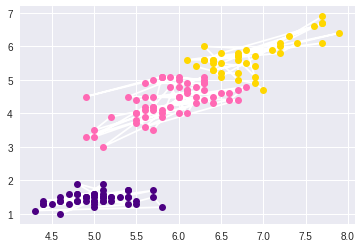

plot for feature 0 with feature 3


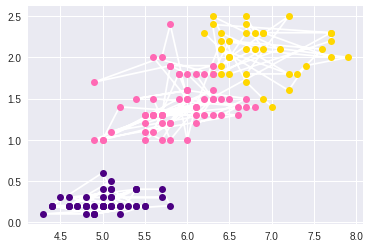

plot for feature 1 with feature 2


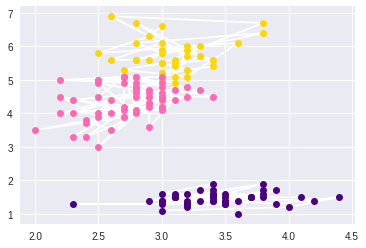

plot for feature 1 with feature 3


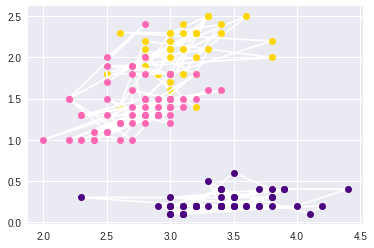

plot for feature 2 with feature 3


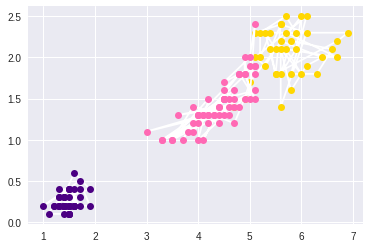

In [0]:
k_means = KMeans(init='k-means++', n_clusters=3, n_init=1)
k_means.fit(X_iris)
plot_iris(X_iris,k_means.labels_)

plot for feature 0 with feature 1


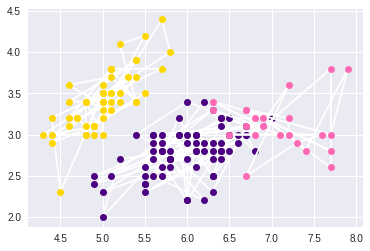

plot for feature 0 with feature 2


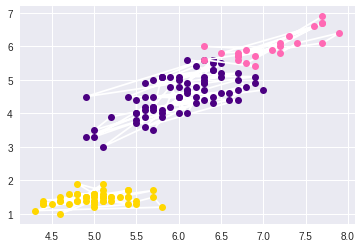

plot for feature 0 with feature 3


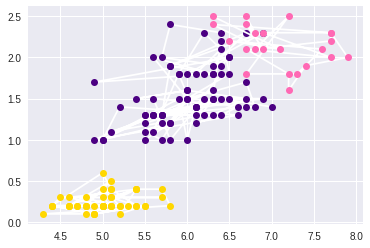

plot for feature 1 with feature 2


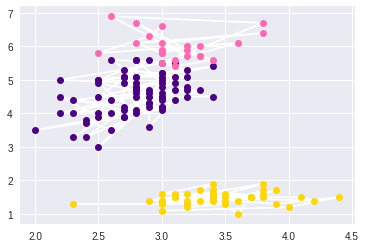

plot for feature 1 with feature 3


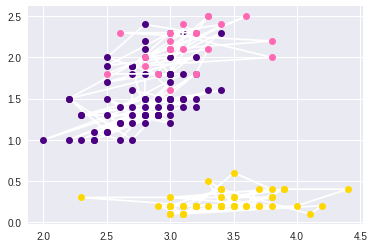

plot for feature 2 with feature 3


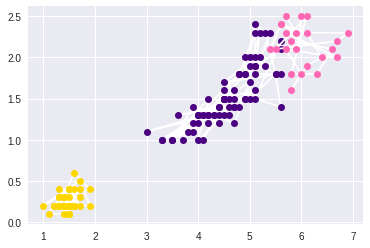

In [0]:
birch = Birch(threshold=0.75, n_clusters=3)
birch.fit(X)
plot_iris(X_iris,birch.labels_)

plot for feature 0 with feature 1


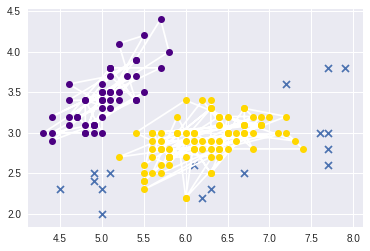

plot for feature 0 with feature 2


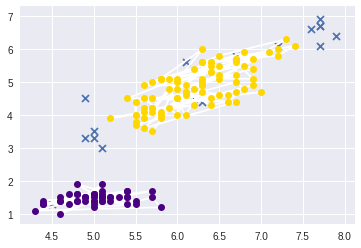

plot for feature 0 with feature 3


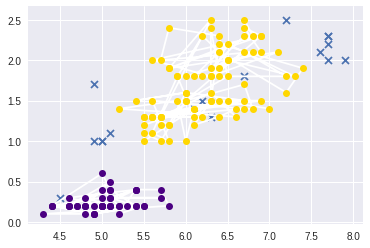

plot for feature 1 with feature 2


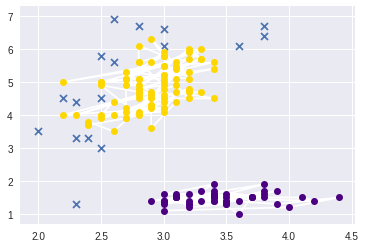

plot for feature 1 with feature 3


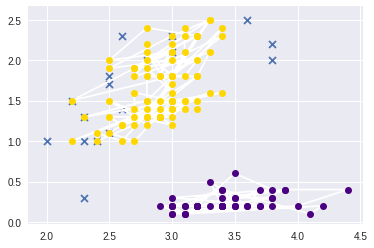

plot for feature 2 with feature 3


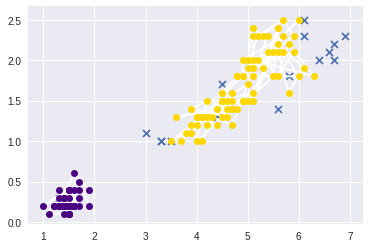

In [0]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)
plot_iris(X_iris,dbscan.labels_,True)

In [0]:
np.vstack([X_iris[:,0],X_iris[:,1]]).T

## f



---


**Dunn index**

Given

$\Delta _{i}={\underset  {x,y\in C_{i}}{{\text{max}}}}d(x,y)$ , which calculates the maximum distance for feature vectors assigned to the same cluster $C_i$

and 

$\delta (C_{i},C_{j}) $ - intercluster distance metric, between clusters Ci and Cj.

Dunn index for *m* clusters is defined as: 

\begin{align}
{\displaystyle \mathit{DI}_m = \frac{ \underset{ 1 \leqslant i < j \leqslant m}{\text{min}} \left.\delta(C_i,C_j)\right.}{ \underset{ 1 \leqslant k \leqslant m}{\text{max}} \left.\Delta_k\right.}}
\end{align}


For a given assignment of clusters, a higher Dunn index indicates better clustering

---
**Davies–Bouldin index**

${\displaystyle S_{i}=\left({\frac {1}{T_{i}}}\sum _{j=1}^{T_{i}}{\left|X_{j}-A_{i}\right|^{p}}\right)^{1/p}}$ 

where $X_j$ is an n-dimensional feature vector assigned to cluster $C_i$

$A_{i}$ is the centroid of $C_i$ and $T_i$ is the size of the cluster $i$. 

$S_i$ is a measure of scatter within the cluster. 

$M_{{i,j}}=\left|\left|A_{i}-A_{j}\right|\right|_{p}={\Bigl (}\displaystyle \sum _{{k=1}}^{{n}}\left|a_{{k,i}}-a_{{k,j}}\right|^{p}{\Bigr )}^{{{\frac  1p}}}$

${\displaystyle M_{i,j}}$ is a measure of separation between cluster ${\displaystyle C_{i}}$ and cluster ${\displaystyle C_{j}} $.

Usually the value of p is 2, which makes this a Euclidean distance.

$R_{{i,j}}={\frac  {S_{i}+S_{j}}{M_{{i,j}}}}$

${\displaystyle D_{i}\equiv \max _{j\neq i}R_{i,j}}$

Davies-Bouldin index is defined as: 
\begin{align}
{\displaystyle {\mathit {DB}}\equiv {\frac {1}{N}}\displaystyle \sum _{i=1}^{N}D_{i}}
\end{align}

 Due to the way it is defined, as a function of the ratio of the within cluster scatter, to the between cluster separation, a lower value will mean that the clustering is better.
 
---

In [0]:
def get_distances_matrix_squared(cloud,points):    
    return (-2*np.dot(cloud,points.T) + np.sum(points**2,axis=1) + np.sum(cloud**2,axis=1)[:,np.newaxis])

In [0]:
def dunn_index(X,labels):
    clusters = np.sum(np.unique(labels) >= 0)
    delta_bot = np.max([np.max(get_distances_matrix_squared(X[labels==i],X[labels==i])) for i in range (clusters)])
    delta_top = np.min([np.min(get_distances_matrix_squared(X[labels==i],X[labels==j])) for i in range (clusters) for j in range (i+1,clusters,1)])
    #print delta_bot,delta_top
    return np.sqrt(delta_top / delta_bot)

In [0]:
dunn_index(X,labels)

0.007128891512094199

In [0]:
def davies_bouldin_index(X,labels):
    clusters = np.sum(np.unique(labels) >= 0)
    arange_0_k = np.arange(0,clusters,1)[:,np.newaxis]
    indicies = arange_0_k == labels
    cluster_sizes = np.sum(indicies, axis = 1)
    centroids = np.dot(indicies.astype(int),X) / np.maximum(cluster_sizes[:,np.newaxis],1)
    #print indicies.shape
    #print centroids.shape, X.shape
    S = np.sqrt( 1./cluster_sizes) * np.sqrt([np.sum( (X[indicies[i]] - centroids[i]) ** 2 ) for i in range (clusters)])
    #print centroids
    M =np.array( np.sqrt( [np.sum((centroids[i] - centroids[j])** 2) for i in range (clusters) for j in range (clusters)])).reshape(clusters,clusters)
    
    #print M.shape
    R = np.array( [  ( S[i] + S[j] ) / M[i,j] if i != j else 0 for i in range (clusters) for j in range (clusters) ]).reshape(clusters,clusters)

    return np.mean(np.max(R,axis=1))
    


In [0]:
davies_bouldin_index(X,labels)

0.5198204688239697

In [0]:
adb = np.array([1,2,3])
np.min(adb - adb[:,np.newaxis],axis=0)

array([-2, -1,  0])

# Task 1 [2p]

Zapoznaj się dokładniej z implementacją algorytmu BIRCH w SciKit (http://scikitlearn.org/stable/modules/clustering.html#birch).


a) Wykonaj grupowanie z niskią wartością parametru threshold (na przykład 0.25). Algorytm
utworzy wówczas dużo grup danych (zazwyczaj więcej niż potrzeba).

b) Zrób nowy rysunek wyników algorytmu BIRCH. Zaznacz na nim pozycje centrów grup
przypisanych do korzenia utworzonego drzewa grupowania (korzeń drzewa zapisany jest w
birch.root_, zaś centra w birch.root_.centroids_) oraz punkty danych w kolorach odpowiadającym
utworzonym grupom. Jeśli utworzone drzewo grupowania ma więcej poziomów, to zrób jeszcze
rysunek dla grupowania na poziomie niżej niż korzeń.

c) Jakie znaczenie ma parametr n_clusters? Czym różni się n_clusters =None od n_clusters = 3? 


##a

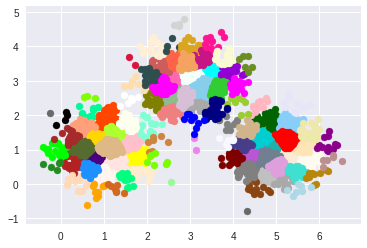

Silhouette Coefficient 0.30020646117275424
Dunn index 0.00791257363474584


In [0]:
birch = Birch(threshold=0.25, n_clusters=None)
birch.fit(X)
scatterClustering(X, birch.labels_)

##b

In [0]:
def plot_with_centroids(X,labels,centroids):
    plt.figure(figsize=(12,12))
    plt_colors = cycle(colors.cnames.keys())

    plt_K = np.unique(labels).size
    print "no of clusters ",plt_K
    for k in xrange(plt_K):
        color = plt_colors.next()
        mask = (labels == k)
        plt.scatter(X[mask, 0], X[mask, 1], color=color, marker='o')
        
    plt.scatter(centroids[:,0],centroids[:,1], marker='x', color='black')
    plt.show()

In [0]:
birch = Birch(threshold=0.30, n_clusters=None)
birch.fit(X)



Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=None,
   threshold=0.3)

TypeError: ignored

In [0]:
print birch.subcluster_centers_.shape

(92, 2)


In [0]:
birch.dummy_leaf_.centroids_

AttributeError: ignored

In [0]:
birch.root_.subclusters_[0].child_.is_leaf

True

In [0]:
birch.root_.centroids_

array([[1.51997608, 1.64980179],
       [4.45170877, 1.68419662]])

In [0]:
plt_K = np.unique(birch.labels_).size
print "no of clusters ",plt_K

no of clusters  92


In [0]:
plot_with_centroids(X,birch.labels_, birch.subcluster_centers_)

In [0]:
zip(np.unique(birch.labels_),range(61))

Silhouette Coefficient 0.4674359782106559
Dunn index 0.0038728714776352963
Silhouette Coefficient 0.30312549067200895
Dunn index 0.006407022314714297


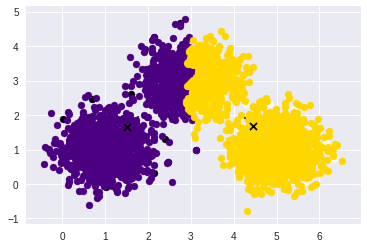

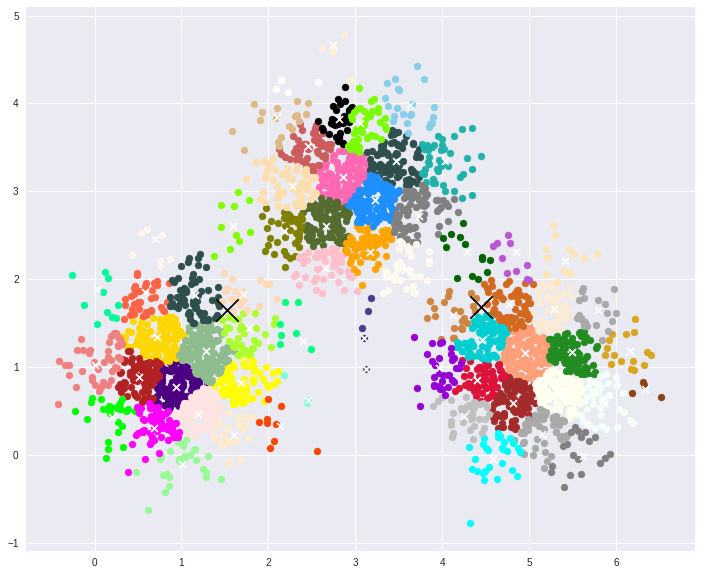

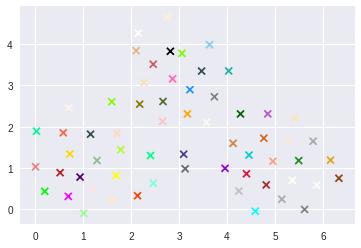

In [0]:
plt.figure()
plt.scatter(birch.root_.centroids_[:,0], birch.root_.centroids_[:,1],marker = 'x',color = 'black', s = 500)
plt.scatter(birch.root_.subclusters_[0].child_.centroids_[:,0],birch.root_.subclusters_[0].child_.centroids_[:,1],color='black')
plt.scatter(birch.root_.subclusters_[1].child_.centroids_[:,0],birch.root_.subclusters_[1].child_.centroids_[:,1],color='white')

new_colors = [0 if elem in birch.root_.subclusters_[0].child_.centroids_ else 1 for elem in birch.subcluster_centers_]
mapping = zip(np.unique(birch.labels_),new_colors)
new_labels = [mapping[label][1] for label in birch.labels_]
#print np.array(new_labels).shape
scatterClustering(X, np.array(new_labels))
plt.scatter(birch.root_.centroids_[:,0], birch.root_.centroids_[:,1],marker = 'x',color = 'black', s = 50)

plt.figure(figsize=(12,10))
scatterClustering(X, birch.labels_)
plt.scatter(birch.root_.centroids_[:,0], birch.root_.centroids_[:,1],marker = 'x',color = 'black', s = 500)
plt.scatter(birch.subcluster_centers_[:,0], birch.subcluster_centers_[:,1],marker = 'x',color = 'white')
plt.show()

plt.scatter(birch.subcluster_centers_[:,0], birch.subcluster_centers_[:,1],marker = 'x',color = plt_colors_history)

Silhouette Coefficient 0.311408724156455
Dunn index 0.0035349836782578273


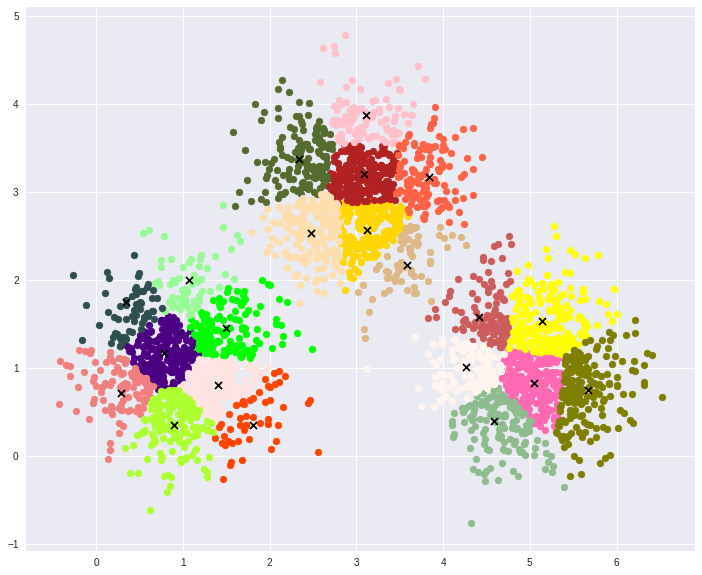

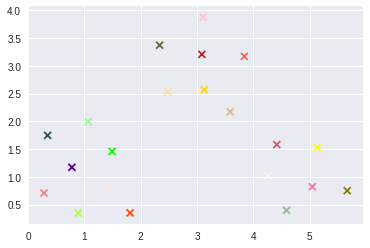

In [0]:
birch = Birch(threshold=0.5, n_clusters=None)
birch.fit(X)
#plot_with_centroids(X,birch.labels_, birch.subcluster_centers_)
plt.figure(figsize=(12,10))
scatterClustering(X, birch.labels_)

plt.scatter(birch.subcluster_centers_[:,0], birch.subcluster_centers_[:,1],marker = 'x',color = 'black')
plt.show()

plt.scatter(birch.subcluster_centers_[:,0], birch.subcluster_centers_[:,1],marker = 'x',color = plt_colors_history)

##c

Number of clusters after the final clustering step, which treats the subclusters from the leaves as new samples.

None : the final clustering step is not performed and the subclusters are returned as they are


Ncluster = 3 spowoduje powstanie 3 grup w wyniku

# Task 2 [2p]

Normalizacja danych to przeskalowanie oryginalnych zarejestrowanych wartości cech na wartości
z przedziału [0, 1] dokonywane za pomocą przekształcenia x’ = (x – xmin) / (xmax – xmin), gdzie x’ to
przeskalowana wartość, x to wartość oryginalna, zaś xmin i xmax to odpowiednio minimalna i
maksymalna zarejestrowana wartość cechy (normalizacji dokonuje się dla każdej cechy osobno).

Standaryzacja danych to przeskalowanie oryginalnych zarejestrowanych wartości cech na wartości
o rozkładzie N(0, 1) dokonywane za pomocą przekształcenia x’ = (x – m) / s, gdzie x’ to
przeskalowana wartość, x to wartość oryginalna, zaś m i s to odpowiednio średnia i odchylenie
standardowe zarejestrowanych wartości cechy (standaryzacji dokonuje się dla każdej cechy
osobno).

Czy normalizacja lub standaryzacja danych może mieć wpływ na działanie algorytmu K-Means?
Jeśli tak, to skonstruuj proste przykłady pokazujące, że dane znormalizowane lub
ustandaryzowane są lepiej grupowane niż dane oryginalne. Zrób stosowne rysunki. A jak jest w
przypadku algorytmów BIRCH i DBScan? 

## normalization

In [0]:
def normalize_data(X):
    max_vector = np.max(X,axis=0)
    min_vector = np.min(X, axis=0)
    #print max_vector, min_vector
    new_X = (X - min_vector) / (max_vector - min_vector)
    return new_X

In [0]:
normalize_data(np.array([[3,2],[1,4],[2,3]]))

array([[1, 0],
       [0, 1],
       [0, 0]])

In [0]:
centers_ = [[1, 1], [3, 3], [5, 1]]
X, labels = datasets.make_blobs(n_samples=3000, n_features=2, centers=centers_, cluster_std=0.5)

scatterClustering(X, labels)

In [0]:
labels.shape

(3000,)

In [0]:
X.shape

(3000, 2)

In [0]:
np.hstack(([1,2,3],[4,5,6]))

array([1, 2, 3, 4, 5, 6])

In [0]:
np.vstack((np.random.normal(0,1,(100,2)),np.random.normal(5,2,(100,2))))

array([[-1.83350364, -0.72713492],
       [-0.90379159,  1.23627074],
       [-0.03920411,  0.3544501 ],
       [-0.43743426,  0.2420434 ],
       [-0.81392081,  0.46066161],
       [-0.21232673, -0.08335917],
       [ 0.43274073,  0.29016199],
       [-0.18334241, -1.48941703],
       [ 0.73785842,  1.45790196],
       [-1.31277265, -1.92880186],
       [ 0.9604373 ,  2.45042101],
       [ 1.239509  ,  2.50081171],
       [ 0.18423379,  2.29733448],
       [ 1.28959951,  2.40531632],
       [ 3.24912528,  1.21501038],
       [ 1.99012409,  2.37239004],
       [ 1.98914167,  1.24843657],
       [ 3.05770852,  2.87016297],
       [ 0.9302883 ,  2.22491482],
       [ 2.97035733,  2.5719334 ]])

In [0]:
X1 = np.vstack((np.random.normal(0,2,(100)),np.random.normal(100,10,(100))))
X2 = np.vstack((np.random.normal(9,2,(100)),np.random.normal(100,5,(100))))
X = np.hstack((X1,X2))

In [0]:
X.shape

(2, 200)

In [0]:
X = X.T

In [0]:
my_labels =np.array( [0]*100+[1]*100)

In [0]:
my_labels.shape

(200,)

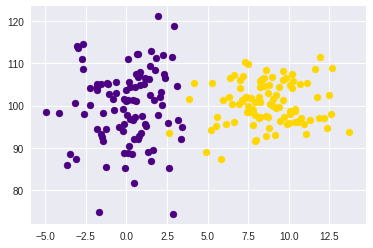

Silhouette Coefficient 0.3254523884564137
Dunn index 0.027406773611122776


In [0]:
scatterClustering(X, my_labels)

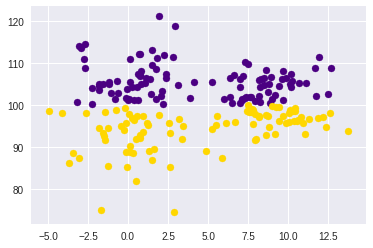

Silhouette Coefficient 0.37063343642030383
Dunn index 0.020332455563509818


In [0]:
k_means = KMeans(init='k-means++', n_clusters=2, n_init=5)
k_means.fit(X)

scatterClustering(X, k_means.labels_)

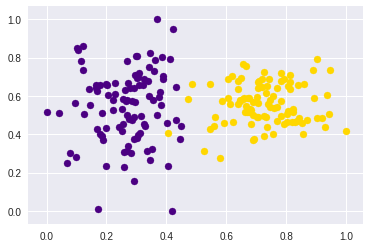

Silhouette Coefficient 0.5412889725027277
Dunn index 0.04997042119041596


In [0]:
normalized_X = normalize_data(X)
scatterClustering(normalized_X,my_labels)

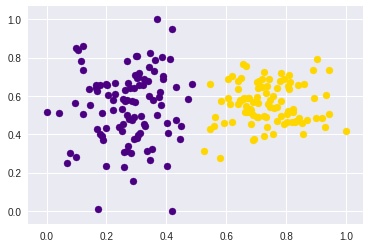

Silhouette Coefficient 0.5494030630367505
Dunn index 0.05885780239519929


In [0]:
k_means = KMeans(init='k-means++', n_clusters=2, n_init=5)
k_means.fit(normalized_X)

scatterClustering(normalized_X, k_means.labels_)

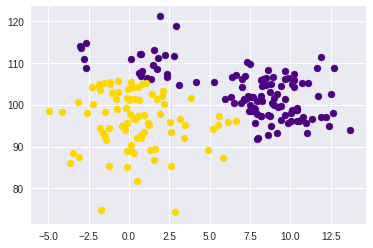

Silhouette Coefficient 0.31962166454243274
Dunn index 0.03369206518524365


In [0]:
birch = Birch(threshold=0.25, n_clusters=2)
birch.fit(X)
scatterClustering(X, birch.labels_)

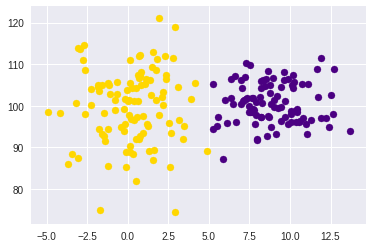

 Silhouette Coefficient 0.3266222157395501
Dunn index 0.023727143749102134


In [0]:
birch = Birch(threshold=0.25, n_clusters=2)
birch.fit(normalized_X)
scatterClustering(X, birch.labels_)

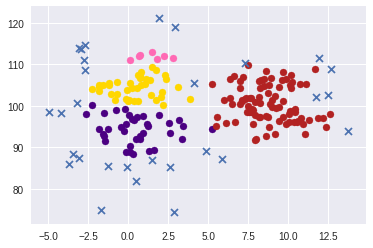

 Silhouette Coefficient 0.2791848306538658
Dunn index 0.049223846598908355


In [0]:
dbscan = DBSCAN(eps=2, min_samples=5)
dbscan.fit(X)
scatterClustering(X, dbscan.labels_,True)

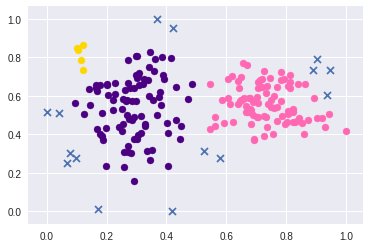

Silhouette Coefficient 0.3970722485514254
Dunn index 0.08860697846714441


In [0]:
dbscan = DBSCAN(eps=0.08, min_samples=5)
dbscan.fit(normalized_X)
scatterClustering(normalized_X, dbscan.labels_,True)

## standardization
Standaryzacja danych to przeskalowanie oryginalnych zarejestrowanych wartości cech na wartości o rozkładzie N(0, 1) dokonywane za pomocą przekształcenia x’ = (x – m) / s, gdzie x’ to przeskalowana wartość, x to wartość oryginalna, zaś m i s to odpowiednio średnia i odchylenie standardowe zarejestrowanych wartości cechy (standaryzacji dokonuje się dla każdej cechy osobno)

In [0]:
def standardize_data(X):
    s = np.mean(X,axis=0)
    m = np.std(X, axis=0)
    
    new_X = (X - m) / s
    return new_X

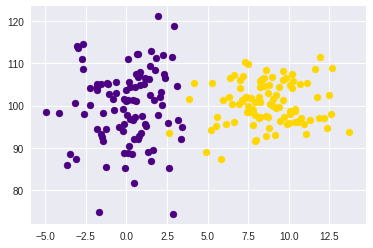

Silhouette Coefficient 0.3254523884564137
Dunn index 0.027406773611122776


In [0]:
scatterClustering(X, my_labels)

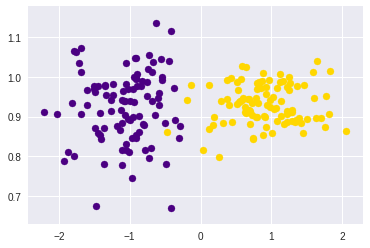

Silhouette Coefficient 0.7138241932417008
Dunn index 0.012319912444923569


In [0]:
standardized_X = standardize_data(X)
scatterClustering(standardized_X,my_labels)

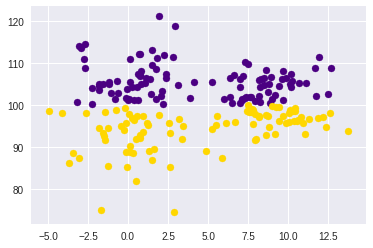

Silhouette Coefficient 0.37063343642030383
Dunn index 0.020332455563509818


In [0]:
k_means = KMeans(init='k-means++', n_clusters=2, n_init=5)
k_means.fit(X)

scatterClustering(X, k_means.labels_)

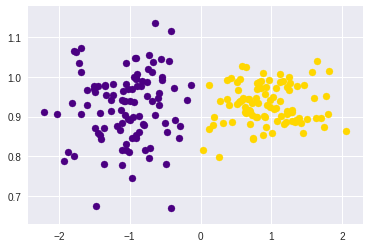

Silhouette Coefficient 0.7267818274663651
Dunn index 0.11311070834368325


In [0]:
k_means = KMeans(init='k-means++', n_clusters=2, n_init=5)
k_means.fit(standardized_X)

scatterClustering(standardized_X, k_means.labels_)

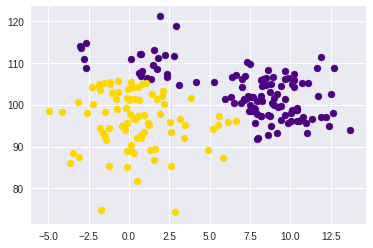

Silhouette Coefficient 0.31962166454243274
Dunn index 0.03369206518524365


In [0]:
birch = Birch(threshold=0.25, n_clusters=2)
birch.fit(X)
scatterClustering(X, birch.labels_)

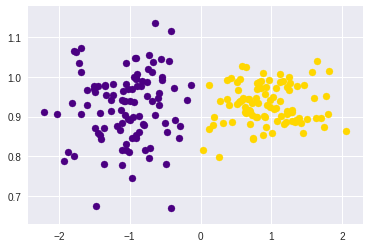

Silhouette Coefficient 0.7267818274663651
Dunn index 0.11311070834368325


In [0]:
birch = Birch(threshold=0.25, n_clusters=2)
birch.fit(standardized_X)
scatterClustering(standardized_X, birch.labels_)

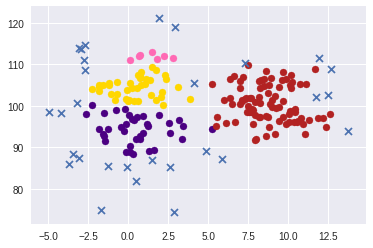

Silhouette Coefficient 0.2791848306538658
Dunn index 0.049223846598908355


In [0]:
dbscan = DBSCAN(eps=2, min_samples=5)
dbscan.fit(X)
scatterClustering(X, dbscan.labels_,True)

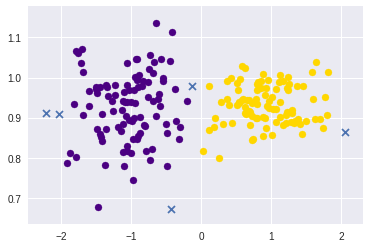

 Silhouette Coefficient 0.6551967549932458
Dunn index 0.14747968198294675


In [0]:
dbscan = DBSCAN(eps=0.15, min_samples=5)
dbscan.fit(standardized_X)
scatterClustering(standardized_X, dbscan.labels_,True)

# Task 3 [4p]

W pliku APEX_OSD_V1_calibr_cube znajduje się wielospektralne zdjęcie satelitarne. Zdjęcie ma
rozmiar 1500 x 1000 pikseli, każdy piksel jest opisany przez 285 wartości. Pogrupuj piksele tego
zdjęcia używając poznanych algorytmów grupowania danych. Sprawdź różne algorytmy i różne ich
parametry, uzyskane grupowania oceń stosując wybrane wskaźniki poprawności. Wyniki
przedstaw w formie mapy terenu. Zastanów się, która z uzyskanych map jest najlepsza.

Wskazówki:
1. Plik APEX_OSD_V1_calibr_cube znajduje się w folderze /pio/scratch/2/ED2015/APEX/
APEX_OSD_Package_1.0/APEX_OSD_Package_1.0 dostępnym w systemie linux na (prawie
wszystkich) komputerach w pracowniach 110 i 137.
2. W Matlabie wielospektralne zdjęcie satelitarne można wczytać poleceniem multibandread z
odpowiednimi parametrami. W przypadku zdjęcia APEX można użyć poniższego kodu:
ImageRaw = multibandread('APEX_OSD_V1_calibr_cube', [1500, 1000, 285],
'int16', 0, 'bsq', 'ieee-le');

UWAGA: Obliczenia mogą być czasochłonne i wymagać dużej ilości pamięci. Sugeruje pracować na
komputerach w pracowni 110.

In [0]:
path = "/pio/scratch/2/ED2015/APEX/APEX_OSD_Package_1.0/APEX_OSD_Package_1.0/APEX_OSD_V1_calibr_cube"
img = np.fromfile(path)
print img.shape

IOError: ignored

In [0]:
!ls "gdrive"

ls: cannot access 'gdrive': No such file or directory
